Business Objective: Analyze Zomato restaurant dataset to understand customer behavior, rating patterns and ordering preferences between online vs offline serving models, and derive insights that can support restaurant strategy decisions.

1.Which type of restaurant is most common?

2.Which category receives the highest votes?

3.Do restaurants offering online orders receive higher ratings?

4.Which restaurant type receives more offline orders vs online orders?

5.Which rating range (3.0–3.5 / 3.5–4.0 / 4.0+) is most frequent?

6.Which category has highest total votes?

7.What pricing range attracts more customers?

Step 1: Import necessary python libraries

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
#pandas is used for data manipulation and analysis 
#numpy is used for numerical operation
#matplotlib.pyplot and seaborn is used for data visulaization

Step 2: create the Data frame 

In [24]:
df= pd.read_csv('Zomato data .csv')

In [25]:
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [26]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Step 3: Convert the data type of the "Rate"  column to float and remove the denominator. 


In [27]:
def handleRate(v):
    v = str(v).split("/")[0]
    return v

df['rate'] = df['rate'].apply(handleRate)
print(df.head())


                    name online_order book_table rate  votes  \
0                  Jalsa          Yes        Yes  4.1    775   
1         Spice Elephant          Yes         No  4.1    787   
2        San Churro Cafe          Yes         No  3.8    918   
3  Addhuri Udupi Bhojana           No         No  3.7     88   
4          Grand Village           No         No  3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Summary of the DataFrame

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


Conclusion- There is no null value in DataFrame

Type of Resturant



Text(0.5, 0, 'Type of Resturant')

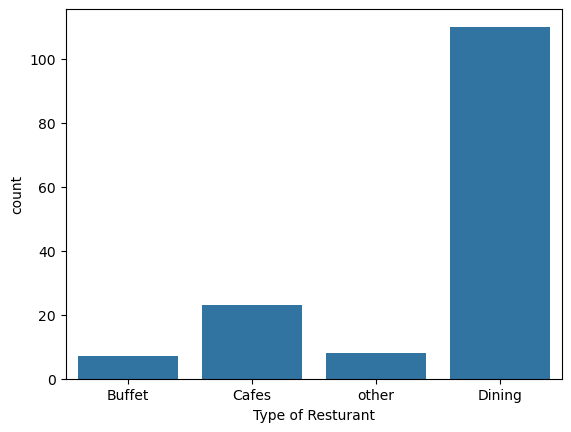

In [29]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Resturant')

Conclusion: The majority of the restaurants in the dataset are categorized under Dining, indicating that Dining is the dominant service format among the observed restaurant types.



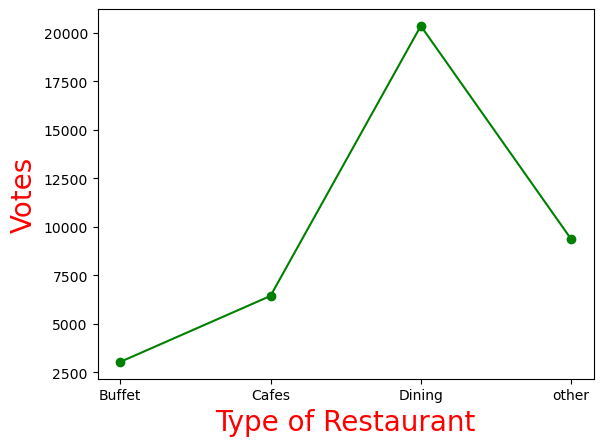

In [32]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()

result = pd.DataFrame({'votes': grouped_data})

plt.plot(result, c='green', marker='o')
plt.xlabel('Type of Restaurant', color='red', fontsize=20)
plt.ylabel('Votes', color='red', fontsize=20)
plt.show()


The majority of restaurants received ratings from customers, indicating that most listed restaurants are actively reviewed by users.

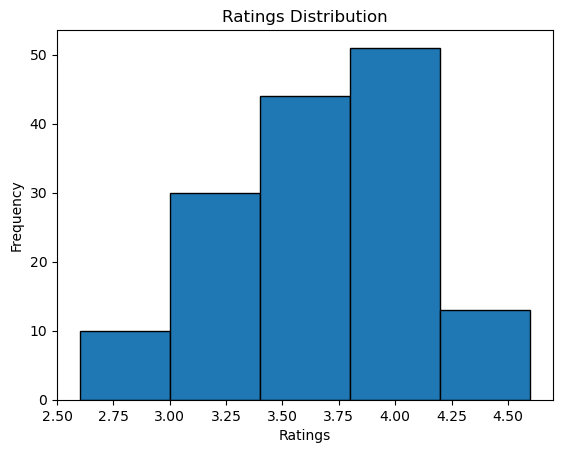

In [37]:
plt.hist(df['rate'], bins=5, edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


Conclusion: Most restaurants have ratings between 3.5 to 4, reflecting generally positive customer perception.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

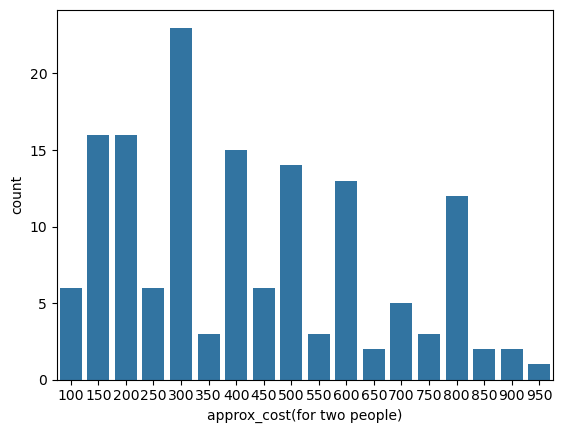

In [38]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

This comparison will help identify whether convenience features such as online ordering contribute to better customer satisfaction and higher ratings.

<Axes: xlabel='online_order', ylabel='rate'>

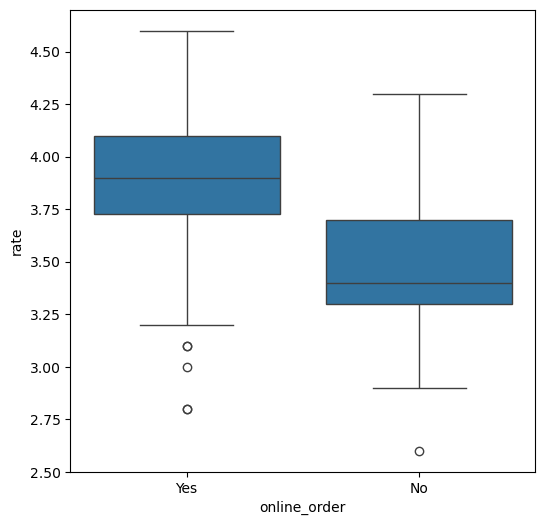

In [39]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

Conclusion: Offline-only restaurants have comparatively lower ratings, while online-order restaurants receive higher ratings overall.

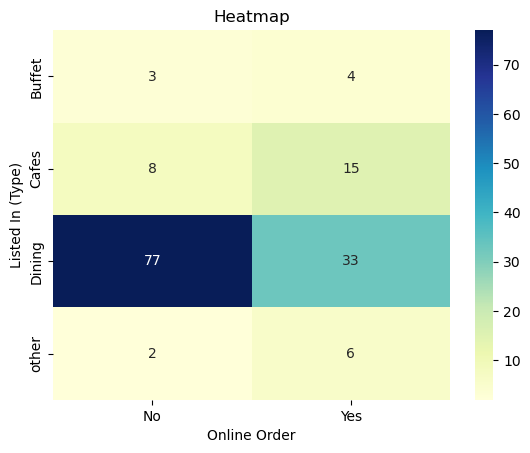

In [43]:
pivot_table = df.pivot_table(
                    index='listed_in(type)',
                    columns='online_order',
                    aggfunc='size',     # <---- IMPORTANT (counts)
                    fill_value=0)

sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()


Conclusion: Dining restaurants primarily receive offline orders, whereas cafés show a higher preference for online ordering. This pattern suggests that customers prefer visiting restaurants physically for dining experiences, while for cafés, they tend to place orders online for convenience.